In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
from analysis import Data,Cuts,Plots

In [3]:
# open data files
gen_dir = "/Users/siddharth/Dropbox/Projects/Dark_Showers/gen/"

# input_sig = "tchannel_13TeV_met800_mchitilde800"
# input_bkg_zjj = "zjj_13TeV_met800"

input_sig = "tchannel_800"
input_bkg_zjj = "Zjj"

sig = Data(gen_dir + input_sig)
bkg_zjj = Data(gen_dir + input_bkg_zjj)

sig.data.head()

,Mt,Mjj,MEt,dphi,deta,nj,nl,ndark,ndiag,MR,R2,aT,Mjj_mc
evt,,,,,,,,,,,,,
0,266.664,262.571,22.7688,1.194620,0.794142,2,0,0,1,NaN,NaN,NaN,NaN
1,395.299,389.728,28.3017,1.447990,1.013230,2,0,0,0,NaN,NaN,NaN,NaN
2,521.580,509.915,64.5103,0.255433,1.517500,2,0,0,0,NaN,NaN,NaN,NaN
3,406.262,397.343,30.3129,0.155629,0.227944,2,0,0,2,NaN,NaN,NaN,NaN
4,695.511,690.270,30.2931,0.072330,1.663170,2,0,1,2,NaN,NaN,NaN,NaN


In [4]:
print sig.data.columns.values

['Mt' 'Mjj' 'MEt' 'dphi' 'deta' 'nj' 'nl' 'ndark' 'ndiag' 'MR' 'R2' 'aT'
 'Mjj_mc']


In [5]:
sig.cuts

No cuts have been defined

In [6]:
ct = Cuts()
Cuts.append(ct,'MEt>800')

sig.select(ct)

In [31]:
print len(sig.data_)
print len(sig.data)

500
30


In [32]:
ct = Cuts()
Cuts.cuts_ = ''
sig.select(ct)

In [33]:
print len(sig.data_)
print len(sig.data)

500
500


In [12]:
sig.get_obj('j',1) # select leading jet
sig.get_obj('j',2).head() # select subleading jet

,pt,m,eta,phi,ntrk
evt,,,,,
1,104.699,21.0407,-0.656790,3.67272,13
2,161.153,22.9571,0.516999,4.23581,8
3,172.590,20.5074,-1.420600,1.40324,4
4,178.845,20.4567,-1.153350,6.17708,11
5,223.950,26.8263,1.271260,3.44445,9


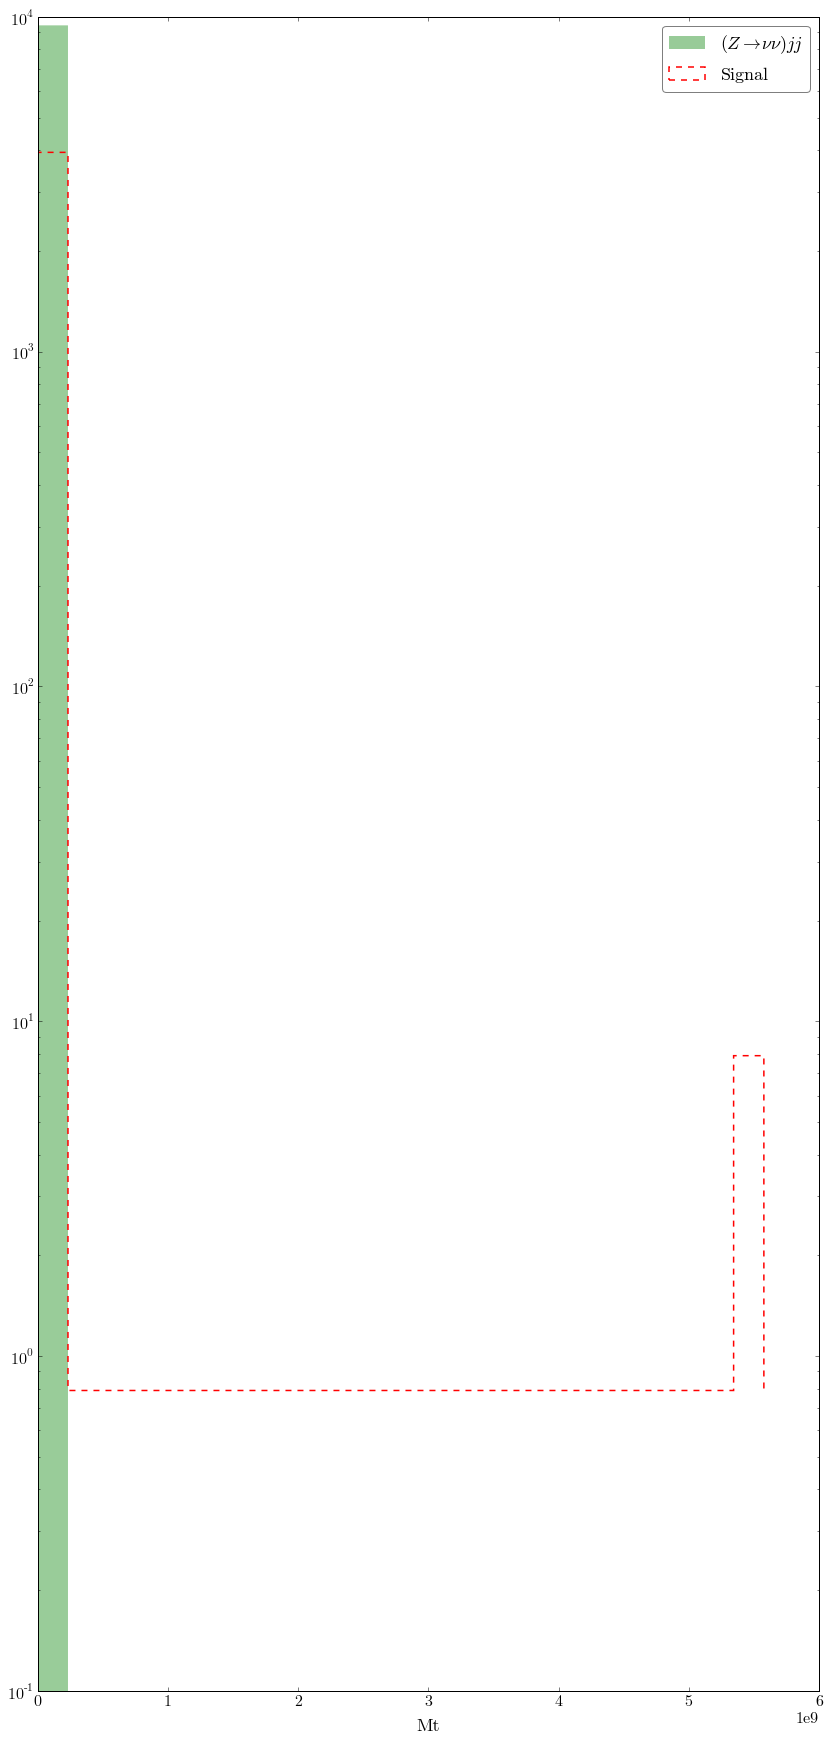

In [17]:
plts = Plots()
plts.hist_var('Mt',sig,[bkg_zjj],[r"$(Z\rightarrow\nu\nu)jj$"])

In [15]:
plts.hist_all(sig,[bkg_zjj],[r"$(Z\rightarrow\nu\nu)jj$"])

ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

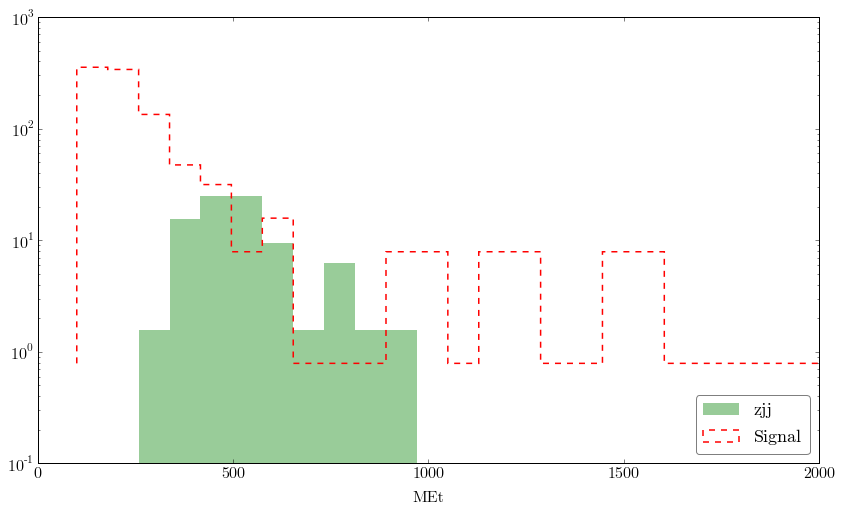

In [35]:
plt.rcParams['figure.figsize'] = 14, 8 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 16
var = 'MEt'
binning = np.linspace(100,2000,25)
plt.hist([list(bkg_zjj.data[var])], bins=binning, stacked=True,color="green", weights=[bkg_zjj.w], log=True, alpha=0.4, lw=0, label='zjj')
plt.hist(list(sig.data[var]), bins=binning, color="red", weights=sig.w, alpha=1.0, lw=1.5, label=r"${\rm Signal}$",histtype="step",linestyle="dashed",log=True)
plt.xlabel(var, labelpad=10)
plt.legend(loc='best', fancybox=True, framealpha=0.5)

In [19]:
ct = Cuts()
Cuts.append(ct,'dphi < .08 & Mjj < 2500 & Mjj > 600 & deta < 1.5')

sig.select(ct)
bkg_zjj.select(ct)

In [20]:
print sig.eff()
print sig.n_evts()
print bkg_zjj.eff()
print bkg_zjj.n_evts()

0.06
48120.6
0.00926538716082
7231.1436135


In [24]:
lambda_y = .8

print "Signal efficiency:",  sig.eff()
print "Background efficiency:",  bkg_zjj.eff()
print
Nsigevt = (lambda_y**4)*sig.n_evts()
Nbkgevt = bkg_zjj.n_evts()
print "Signal events expected in 1 /ab:", Nsigevt
print "Background events expected in 1 /ab:", Nbkgevt

Signal efficiency: 0.06
Background efficiency: 0.00926538716082

Signal events expected in 1 /ab: 19710.19776
Background events expected in 1 /ab: 7231.1436135


## Event display

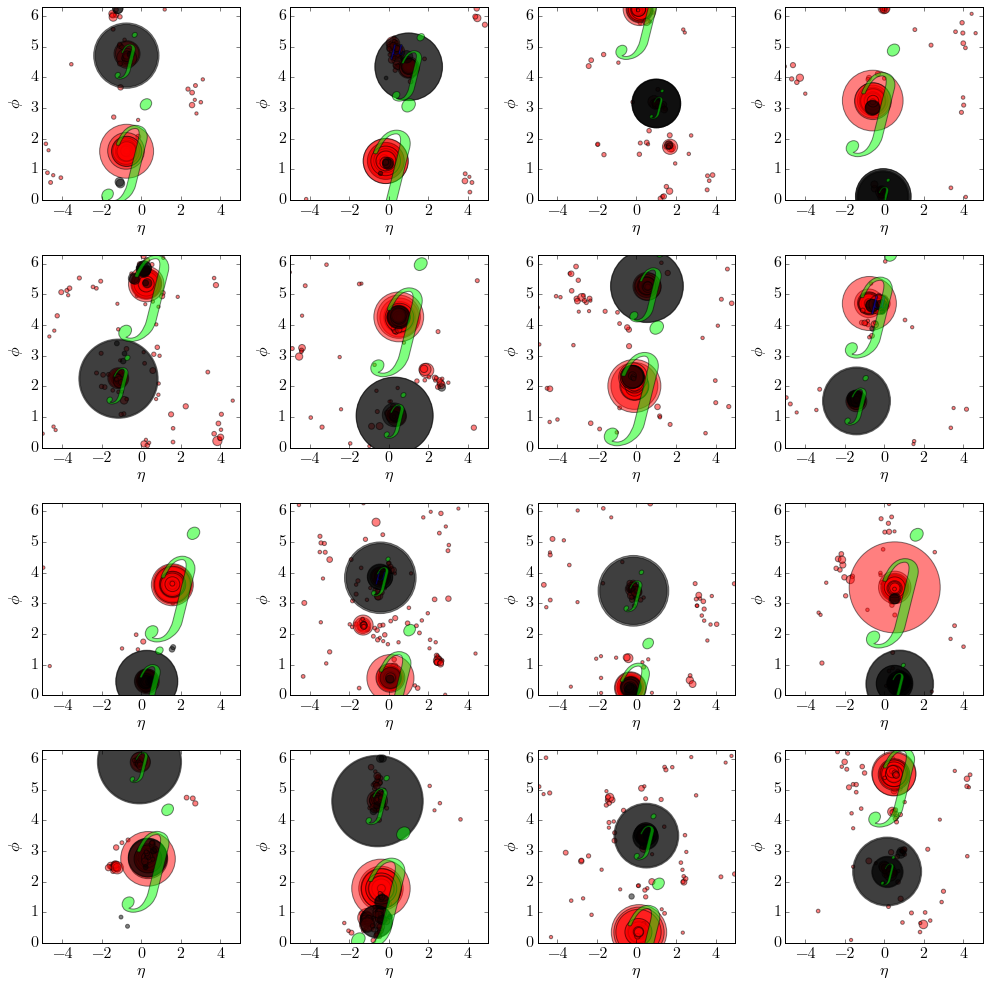

In [24]:
plts.event_display(sig)

## Limits and stuff

In [3]:
# Open data files simulating events in that last ATLAS MET bin control region

input_sig_100 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi100")
input_sig_200 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi200")
input_sig_400 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi400")
input_sig_600 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi600")
input_sig_800 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi800")
input_sig_1000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi1000")
input_sig_2000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi2000")
input_sig_3000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi3000")

In [4]:
pb = 1;
ab = 10**-6*pb;
nevents=4.


lambda_excl_ATLAS=[]
lambda_excl_ATLAS.append((nevents/(input_sig_100.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_200.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_400.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_600.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_800.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_1000.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_2000.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_3000.meta['cxn'][0]*pb*((.02)/ab)))**.25)

m_excl_ATLAS=[]
m_excl_ATLAS=[100,200,400,600,800,1000,2000,3000]

In [5]:
# Open data files simulating events for CMS13 with MET > 800 GeV and some basic cuts

input_sig_100 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde100")
input_sig_400 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde400")
input_sig_600 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde600")
input_sig_800 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde800")
input_sig_1000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde1000")
input_sig_2000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde2000")
input_sig_3000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde3000")

input_bkg = Data("./CMS_13/zjj_13TeV_met800")

In [6]:
# Apply some basic cuts

cut = Cuts()
Cuts.append(cut,'dphi_min < .08 & mjj < 2500 & mjj > 600 & deta_jj < 1.5')

input_sig_100.select(cut)
input_sig_400.select(cut)
input_sig_600.select(cut)
input_sig_800.select(cut)
input_sig_1000.select(cut)
input_sig_2000.select(cut)
input_sig_3000.select(cut)

input_bkg.select(cut)

In [49]:
def signif(sig, bkg, sign):
    sigEff = len(sig.data)/np.float(len(sig.data_))
    bkgEff = len(bkg.data)/np.float(len(bkg.data_))
    print sigEff, bkgEff
    nsig = sig.meta.at[0,'cxn']*pb*(1/ab)*sigEff
    nbkg = bkg.meta.at[0,'cxn']*pb*(1/ab)*bkgEff
    print nsig, nbkg

    func = lambda lamb: (((lamb**4)*nsig)/np.sqrt((lamb**4)*nsig+nbkg)) - sign
    from scipy.optimize import fsolve
    return fsolve(func, 1)[0]

In [52]:
lambda_excl_13=[]
lambda_excl_13.append(signif(input_sig_100,input_bkg,3))
lambda_excl_13.append(signif(input_sig_400,input_bkg,3))
lambda_excl_13.append(signif(input_sig_600,input_bkg,3))
lambda_excl_13.append(signif(input_sig_800,input_bkg,3))
lambda_excl_13.append(signif(input_sig_1000,input_bkg,3))
lambda_excl_13.append(signif(input_sig_2000,input_bkg,3))
lambda_excl_13.append(signif(input_sig_3000,input_bkg,3))

m_excl_13=[]
m_excl_13=[100,400,600,800,1000,2000,3000]

0.357 0.0070341987876
1026.8034 195.213788173
0.3598 0.0070341987876
924.20027 195.213788173
0.3686 0.0070341987876
829.563788 195.213788173
0.3614 0.0070341987876
692.09907 195.213788173
0.3646 0.0070341987876
578.197264 195.213788173
0.3672 0.0070341987876
203.362704 195.213788173
0.3622 0.0070341987876
76.4941046 195.213788173


In [53]:
GeV = 10**6;
eV = 10**-9*GeV;
KeV = 10**-6*GeV;
MeV = 10**-3*GeV;
TeV = 10**3*GeV;

Sec = (1/(6.582119*10**-16))/eV; 
Kmps = 3.3356*10**-6;
Centimeter = 5.0677*10**13/GeV;
mm = 0.1*Centimeter;
Meter = 100*Centimeter;
Km = 10**5*Centimeter;
Kilogram = 5.6085*10**35*eV;
Day = 86400*Sec;
Year = 365*Day;
KgDay = Kilogram*Day;
amu = 1.66053892*10**-27*Kilogram;
Mpc = 3.086*10**24*Centimeter;

def lambda_excl_disp(m_chi): 
    return ((32*np.pi/(3*4))*(m_chi*GeV)**4/((5*MeV)**2*(20*GeV)**3*1*mm))**0.25

def lambda_excl_jj(m_chi): 
    return (8*np.pi*.1**5*m_chi/175)**0.5

In [54]:
m_disp = np.linspace(100,3000,100) # 100 linearly spaced numbers
lambda_disp = lambda_excl_disp(m_disp) 

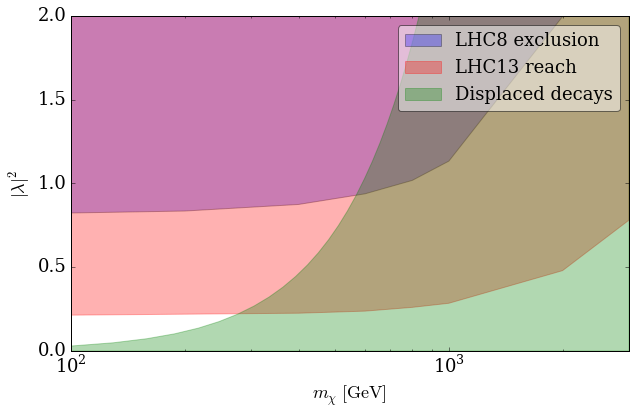

In [55]:
plt.rcParams['figure.figsize'] = 10., 6

plt.fill_between(m_excl_ATLAS,np.square(lambda_excl_ATLAS),100,alpha=0.3, label="LHC8 exclusion")
plt.fill_between(m_excl_13,np.square(lambda_excl_13),100,alpha=0.3, color="red", label="LHC13 reach")
plt.fill_between(m_disp,np.square(lambda_disp),0,alpha=0.3, color="green", label="Displaced decays")

plt.xscale("log")
plt.ylabel("$|\lambda|^2$")
plt.yscale("linear")


plt.xlabel(r"$m_{\chi}$ $\rm[GeV]$ ")
plt.xlim(100,3000)
plt.ylim(0,2)
#plt.yscale("log")
plt.legend(loc='best', fancybox=True, framealpha=0.5)
#plt.savefig("tchannel_limits_displaced.pdf")

In [79]:
# Open data files simulating events for CMS13 with MET > 800 GeV and some basic cuts

input_sig_100 = Data("./CMS_13_new/tchannel_met800_mchitilde_100")
input_sig_400 = Data("./CMS_13_new/tchannel_met800_mchitilde_400")
input_sig_600 = Data("./CMS_13_new/tchannel_met800_mchitilde_600")
input_sig_800 = Data("./CMS_13_new/tchannel_met800_mchitilde_800")
input_sig_1000 = Data("./CMS_13_new/tchannel_met800_mchitilde_1000")
# input_sig_2000 = Data("./CMS_13_new/tchannel_mchitilde_2000")
# input_sig_3000 = Data("./CMS_13_new/tchannel_mchitilde_3000")

input_bkg = Data("./CMS_13_new/Zjj_met800")

In [84]:
input_bkg.data_['MEt'].head()

evt
0      1135.970
1       825.825
2      1010.080
3      1070.150
4       946.689
Name: MEt, dtype: float64

In [86]:
input_sig_600.data_['MEt']

evt
0       1203.80
1       1728.57
2       7430.62
3       3663.59
4       1938.77
5       5016.13
6      15640.80
7      18661.60
8      13335.10
9       2330.68
10      1293.28
11      8845.20
12     55815.10
13     64032.00
14     17217.50
...
985    21968.000
986    63787.000
987     4022.590
988      928.464
989     1041.270
990     4377.230
991     5104.590
992     4921.380
993     1183.550
994    16802.800
995    14412.300
996     2338.460
997    21786.200
998     1935.340
999    24113.100
Name: MEt, Length: 1000, dtype: float64

In [81]:
# Apply some basic cuts

cut = Cuts()
Cuts.append(cut,'dphi < .08 & Mjj < 2500 & Mjj > 600 & deta < 1.5 & MEt > 500')

input_sig_100.select(cut)
input_sig_400.select(cut)
input_sig_600.select(cut)
input_sig_800.select(cut)
input_sig_1000.select(cut)
input_sig_2000.select(cut)
input_sig_3000.select(cut)

input_bkg.select(cut)

In [82]:
lambda_excl_13=[]
lambda_excl_13.append(signif(input_sig_100,input_bkg,3))
lambda_excl_13.append(signif(input_sig_400,input_bkg,3))
lambda_excl_13.append(signif(input_sig_600,input_bkg,3))
lambda_excl_13.append(signif(input_sig_800,input_bkg,3))
lambda_excl_13.append(signif(input_sig_1000,input_bkg,3))
lambda_excl_13.append(signif(input_sig_2000,input_bkg,3))
lambda_excl_13.append(signif(input_sig_3000,input_bkg,3))

m_excl_13=[]
m_excl_13=[100,400,600,800,1000,2000,3000]

0.056 0.0232488822653
1710.0888 119.876119225
0.054 0.0232488822653
1258.1568 119.876119225
0.055 0.0232488822653
953.8265 119.876119225
0.062 0.0232488822653
773.4314 119.876119225
0.064 0.0232488822653
560.53696 119.876119225
0.016 0.0232488822653
520.536 119.876119225
0.013 0.0232488822653
93.62847 119.876119225


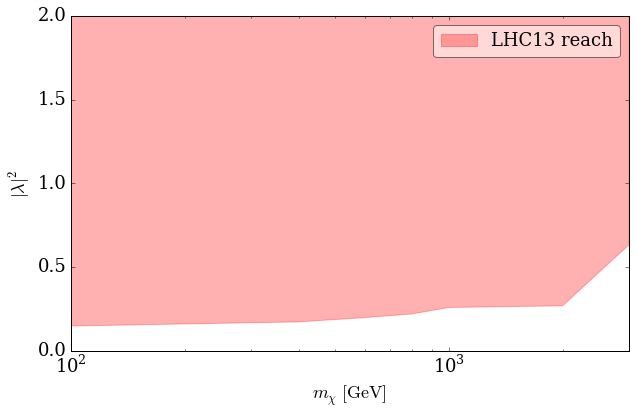

In [83]:
plt.rcParams['figure.figsize'] = 10., 6

# plt.fill_between(m_excl_ATLAS,np.square(lambda_excl_ATLAS),100,alpha=0.3, label="LHC8 exclusion")
plt.fill_between(m_excl_13,np.square(lambda_excl_13),100,alpha=0.3, color="red", label="LHC13 reach")
# plt.fill_between(m_disp,np.square(lambda_disp),0,alpha=0.3, color="green", label="Displaced decays")

plt.xscale("log")
plt.ylabel("$|\lambda|^2$")
plt.yscale("linear")


plt.xlabel(r"$m_{\chi}$ $\rm[GeV]$ ")
plt.xlim(100,3000)
plt.ylim(0,2)
#plt.yscale("log")
plt.legend(loc='best', fancybox=True, framealpha=0.5)
plt.savefig("tchannel_wtf.pdf")